**Question:**
六人组，每人带一宝石手套，去找灭霸决战，到了草屋，七人围圈而坐，六对一，灭霸人少，给予先打响指的权利，灭霸打后，超级英雄全化灰就灭霸胜，没全化灰就由一个活着的超级英雄打一个响指，看二分之一消失的概率能不能把灭霸打成灰。没成灰就继续第二回合，灭霸继续优先打响指 </br>
问灭霸死的概率是多少

In [141]:
import numpy as np
%pylab inline
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
import pandas as pd
np.random.seed(1111)
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from IPython.display import HTML, display, FileLink
from base64 import b64encode, b64decode
from io import StringIO, BytesIO
from contextlib import contextmanager
def display_dataframe(df, filename=None, encoding='utf-8', format='csv', type='button',gradientfunc=False, **kwargs):
    #display(df)
    #if isinstance(df, pd.DataFrame):
    #    display(df.style.set_caption(filename))
    #else:
    if gradientfunc == False:
        display(df.style.set_caption(filename))    
    else:
        display(df.style.format(gradient_func).set_caption(filename)) 
    if filename is None:
        filename = "dataframe"
    if format == 'csv':
        data = df.to_csv(**kwargs)
        mime_type = 'text/csv'
        filename = filename + '.csv'
    elif format == 'tsv':
        data = df.to_csv(**kwargs)
        mime_type = 'text/plain'
        filename = filename + '.txt'
    else:
        raise ValueError('unknown file format: {}'.format(format))
    data = 'data:{mime_type};base64,'.format(mime_type=mime_type) + str(b64encode(bytes(data, encoding=encoding)), encoding=encoding)
    if type == 'hyperlink':
        display(HTML('<a href=" " download={filename} target="_blank">{filename}</a >'.format(
            mime_type=mime_type, filename=filename, data=data)))
    elif type == 'button':
        button_id = 'button_{}'.format(np.random.randint(1000000000))
        display(HTML(r'<input type="button" id="{0}" value="Download">'.format(button_id)))
        display(HTML('''<script>
    document.getElementById("{button_id}").addEventListener("click", function(event){{
        var filename = "{filename}";
        var data = "{data}";
        const element = document.createElement('a');
        element.setAttribute('href', data);
        element.setAttribute('download', filename);
        element.style.display = 'none';
        document.body.appendChild(element);
        element.click();
        document.body.removeChild(element);
    }});
</script>'''.format(button_id=button_id, filename=filename, data=data)))

Populating the interactive namespace from numpy and matplotlib


In [40]:
np.random.randint(0,2,size=6)

array([0, 0, 0, 0, 0, 0])

In [41]:
def check_survive(input_num):
    '''
    input_num: how many people to be decided to survive by stones
    status: 0 means dead, 1 means alive
    '''
    random_output = np.random.randint(0,2,size=input_num)
    alive = random_output.sum()
    dead = random_output.shape[0] - alive
    return alive, dead

In [47]:
check_survive(6)

(5, 1)

In [62]:
np.random.randint(2)

1

In [193]:
avengers_alive_num = 6
round_num = 0
while True:
    round_num += 1
    avengers_alive_num,avengers_dead_num = check_survive(avengers_alive_num)
    print ('Round {}, avengers alive: {}, dead: {}'.format(round_num,avengers_alive_num,avengers_dead_num) )
    if avengers_alive_num ==0:
        print ('Avengers die first')
        break
    elif np.random.randint(2) ==0:
        print ('Thanos die first')
        break

Round 1, avengers alive: 4, dead: 2
Round 2, avengers alive: 0, dead: 4
Avengers die first


In [163]:
def summarize(avengers_alive_num = 6):
    round_num = 0
    while True:
        round_num += 1
        avengers_alive_num,avengers_dead_num = check_survive(avengers_alive_num)
        #print ('Round {}, avengers alive: {}, dead: {}'.format(round_num,avengers_alive_num,avengers_dead_num) )
        if avengers_alive_num ==0:
            #print ('Avengers die first')
            return round_num, 1
        elif np.random.randint(2) ==0:
            #print ('Thanos die first')
            return round_num, 0

In [179]:
test_time = 14000605
summarize_data = np.ndarray([test_time,2])
for i in tqdm(range(test_time)):
    summarize_data[i] = summarize()

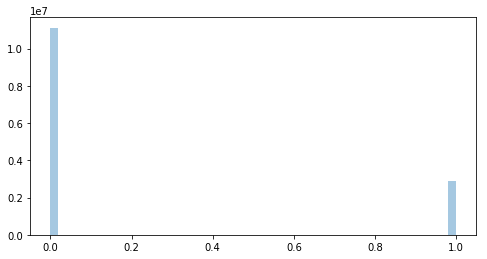

In [180]:
fig,ax=plt.subplots(figsize=(8,4))
sns.distplot(summarize_data[:,1],kde=0,ax=ax)

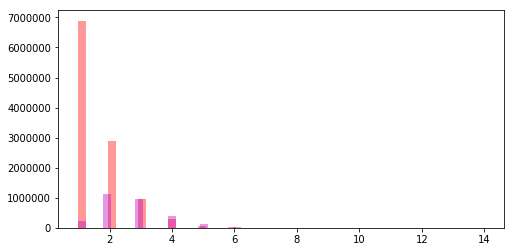

In [181]:
fig,ax=plt.subplots(figsize=(8,4))
sns.distplot(summarize_data[np.where(summarize_data[:,1]==0)][:,0],kde=0,ax=ax,color='r')
sns.distplot(summarize_data[np.where(summarize_data[:,1]==1)][:,0],kde=0,ax=ax,color='m')

In [182]:
print ('Avengers win {}, Thanos win {}'.format(1 - summarize_data[:,1].sum()/test_time,summarize_data[:,1].sum()/test_time) )

Avengers win 0.7941024691432977, Thanos win 0.20589753085670226


In [183]:
unique_sum = np.unique(summarize_data[np.where(summarize_data[:,1]==0)][:,0],return_counts=1)
df = pd.DataFrame(np.concatenate((unique_sum[1].reshape(-1,1),unique_sum[0].astype('int').reshape(-1,1),unique_sum[1].reshape(-1,1)/test_time),axis=1))
df.iloc[:,1] = np.array(df.iloc[:,1]).astype('int')
df = df.set_index(1)
df.columns = ['win time','win probability']
display_dataframe(df,filename='Avengers win times in {} times'.format(test_time))
    

,win time,win probability
1,,
1,6.89009e+06,0.492128
2,2.87929e+06,0.205655
3,964531,0.0688921
4,281705,0.0201209
5,75992,0.00542777
6,19592,0.00139937
7,4984,0.000355985
8,1275,9.10675e-05
9,333,2.37847e-05


In [184]:
unique_sum = np.unique(summarize_data[np.where(summarize_data[:,1]==1)][:,0],return_counts=1)
df = pd.DataFrame(np.concatenate((unique_sum[1].reshape(-1,1),unique_sum[0].astype('int').reshape(-1,1),unique_sum[1].reshape(-1,1)/test_time),axis=1))
df.iloc[:,1] = np.array(df.iloc[:,1]).astype('int')
df = df.set_index(1)
df.columns = ['win time','win probability']
display_dataframe(df,filename='Thanos win times in {} times'.format(test_time))
    

,win time,win probability
1,,
1,218425,0.0156011
2,1.13556e+06,0.0811078
3,948045,0.0677146
4,402544,0.0287519
5,128792,0.00919903
6,36425,0.00260167
7,9574,0.000683828
8,2471,0.000176492
9,658,4.6998e-05


灭霸死的有点惨，其实复仇者初始只有两个人的时候概率稍微对等

In [185]:
def summarize(avengers_alive_num = 6):
    round_num = 0
    while True:
        round_num += 1
        avengers_alive_num,avengers_dead_num = check_survive(avengers_alive_num)
        #print ('Round {}, avengers alive: {}, dead: {}'.format(round_num,avengers_alive_num,avengers_dead_num) )
        if avengers_alive_num ==0:
            #print ('Avengers die first')
            return round_num, 1
        elif np.random.randint(2) ==0:
            #print ('Thanos die first')
            return round_num, 0

In [186]:
test_time = 14000605
summarize_data = np.ndarray([test_time,2])
for i in tqdm(range(test_time)):
    summarize_data[i] = summarize(avengers_alive_num =2)

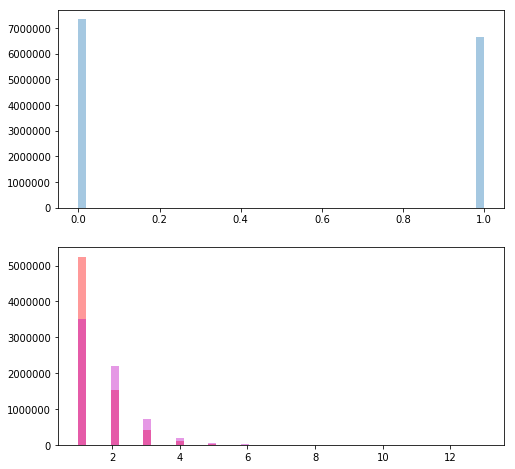

In [187]:
fig,ax=plt.subplots(2,1,figsize=(8,8))
sns.distplot(summarize_data[:,1],kde=0,ax=ax[0])
sns.distplot(summarize_data[np.where(summarize_data[:,1]==0)][:,0],kde=0,ax=ax[1],color='r')
sns.distplot(summarize_data[np.where(summarize_data[:,1]==1)][:,0],kde=0,ax=ax[1],color='m')

In [188]:
print ('Avengers win {}, Thanos win {}'.format(1 - summarize_data[:,1].sum()/test_time,summarize_data[:,1].sum()/test_time) )

Avengers win 0.5239146451171217, Thanos win 0.4760853548828783


In [189]:
unique_sum = np.unique(summarize_data[np.where(summarize_data[:,1]==0)][:,0],return_counts=1)
df = pd.DataFrame(np.concatenate((unique_sum[1].reshape(-1,1),unique_sum[0].astype('int').reshape(-1,1),unique_sum[1].reshape(-1,1)/test_time),axis=1))
df.iloc[:,1] = np.array(df.iloc[:,1]).astype('int')
df = df.set_index(1)
df.columns = ['win time','win probability']
display_dataframe(df,filename='Avengers win times in {} times'.format(test_time))
    
unique_sum = np.unique(summarize_data[np.where(summarize_data[:,1]==1)][:,0],return_counts=1)
df = pd.DataFrame(np.concatenate((unique_sum[1].reshape(-1,1),unique_sum[0].astype('int').reshape(-1,1),unique_sum[1].reshape(-1,1)/test_time),axis=1))
df.iloc[:,1] = np.array(df.iloc[:,1]).astype('int')
df = df.set_index(1)
df.columns = ['win time','win probability']
display_dataframe(df,filename='Thanos win times in {} times'.format(test_time))

,win time,win probability
1,,
1,5.25144e+06,0.375087
2,1.53137e+06,0.109379
3,410229,0.0293008
4,106185,0.00758432
5,26915,0.00192242
6,6759,0.000482765
7,1714,0.000122423
8,376,2.6856e-05
9,100,7.14255e-06


,win time,win probability
1,,
1,3.49812e+06,0.249855
2,2.18628e+06,0.156156
3,712269,0.0508742
4,198958,0.0142107
5,52039,0.00371691
6,13288,0.000949102
7,3400,0.000242847
8,825,5.8926e-05
9,216,1.54279e-05


In [190]:
print ('Avengers win {}, Thanos win {}'.format(1 - summarize_data[:,1].sum()/test_time,summarize_data[:,1].sum()/test_time) )

Avengers win 0.5239146451171217, Thanos win 0.4760853548828783
